In [1]:
import gym
from PPO.PPO import PPO
from PPO.PPO import run_test_env

In [2]:
# HYPER-PARAMETERS #
max_frames       = int(2e6) * 8
max_rewards      = -100
num_steps        = 2048
num_envs         = 8
batch_size       = 512
ppo_epochs       = 10
clip_range       = 0.2
lr               = 3e-4
vf_coef          = 0.5
ent_coef         = 0.0
gamma            = 0.99
lam              = 0.95
log_every        = 10
runs_for_episode = 5
test_episodes    = 10
log_file         = './logs/Pendulum-v0.pth'

In [3]:
def make_env():
    def _thunk():
        env = gym.make('Pendulum-v0')
        return env
    return _thunk


def make_test_env():
    return None

In [4]:
ppo = PPO(make_env, device='auto')

In [ ]:
# Run this cell to load a previous checkpoint
ppo.load(log_file)

<Figure size 432x288 with 0 Axes>

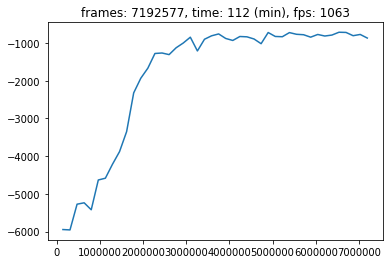

Saved -> frames: 7192577, time: 112 (min)


In [ ]:
ppo.learn(max_frames, max_rewards=max_rewards, num_steps=num_steps, num_envs=num_envs, batch_size=batch_size,
          ppo_epochs=ppo_epochs, clip_range=clip_range, lr=lr, vf_coef=vf_coef, ent_coef=ent_coef, gamma=gamma, lam=lam,
          log_every=log_every, plot=True, save=True, log_file=log_file, test_env=make_test_env(), runs_for_episode=runs_for_episode, test_episodes=test_episodes)

In [ ]:
del ppo

In [ ]:
ppo = PPO(make_env, device='cpu')

In [ ]:
ppo.load(log_file)

In [ ]:
env = make_env()()
n_episode = 3

mean_reward = run_test_env(env=env, model=ppo, n_runs=n_episode, vis=True, deterministic=False)
env.close()

print('Mean reward over %i episodes = %f' % (n_episode, mean_reward))